## Análise de Sono
Durante x dias eu realizei a coleta e registro dos dados do meu sono. 

Foi utilizado o Smartwatch Redmi GTS 2 Mini para coletar os dados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [ ]:
raw_data = pd.read_csv("../data/sleep_data.csv")

In [ ]:
raw_data

In [ ]:
print(f"Número de Linhas da Base de Dados: {raw_data.shape[0]}")
print(f"Número de Colunas da Base de Dados: {raw_data.shape[1]}")

In [ ]:
raw_data.isna().sum()

In [ ]:
raw_data["Sono profundo (min)"] = raw_data["Sono profundo"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))
raw_data["REM (min)"] = raw_data["REM"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))
raw_data["Duração (min)"] = raw_data["Duração"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))

In [ ]:
raw_data["Sono leve (min)"] = raw_data["Duração (min)"] - raw_data["REM (min)"] - raw_data["Sono profundo (min)"]

In [ ]:
raw_data["%REM"] = raw_data.apply(lambda x: round((x["REM (min)"] / x["Duração (min)"]) * 100, 2), axis=1)
raw_data["%Sono profundo"] = raw_data.apply(lambda x: round((x["Sono profundo (min)"] / x["Duração (min)"]) * 100, 2), axis=1)
raw_data["%Sono leve"] = raw_data.apply(lambda x: round((x["Sono leve (min)"] / x["Duração (min)"]) * 100, 2), axis=1)

In [ ]:
raw_data.head()

In [ ]:
from datetime import datetime

raw_data["Data"] = pd.to_datetime(
    raw_data["Data"] + f"/{datetime.now().year}", 
    format="%d/%m/%Y"
)


In [ ]:
raw_data["Data"] = pd.to_datetime(raw_data["Data"]).dt.date

In [ ]:
raw_data

In [ ]:
data = raw_data[["Data", "Dia da semana", "Pontuação","Regularidade", 
                 "Duração (min)", "Sono leve (min)","%Sono leve", 
                 "Sono profundo (min)", "%Sono profundo", "REM (min)", "%REM", 
                 "Tempo acordado", "Vezes acordado"               
]]

In [ ]:
data.head()

In [ ]:
metricas = ["Pontuação","Regularidade", 
            "Duração (min)", "Sono leve (min)","%Sono leve", 
            "Sono profundo (min)", "%Sono profundo", "REM (min)", "%REM", 
            "Tempo acordado", "Vezes acordado"]

In [ ]:
metricas

In [ ]:
for metrica in metricas:
    Q1 = data[metrica].quantile(0.25)
    Q3 = data[metrica].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers_mask = (data[metrica] < limite_inferior) | (data[metrica] > limite_superior)
    outliers_df = data[outliers_mask].copy()
    non_outliers_df = data[~outliers_mask].copy()

    print(f"\nAnálise de Outliers - {metrica}")
    print(f"• Primeiro Quartil (Q1): {Q1:.2f}")
    print(f"• Terceiro Quartil (Q3): {Q3:.2f}")
    print(f"• IQR: {IQR:.2f}")
    print(f"• Limite Inferior: {limite_inferior:.2f}")
    print(f"• Limite Superior: {limite_superior:.2f}")
    print(f"• Outliers Detected: {len(outliers_df)}")

    plt.figure(figsize=(16, 8))

    media = data[metrica].mean()

    sns.scatterplot(x=non_outliers_df.index, y=non_outliers_df[metrica], color="skyblue", label="Normal", s=80)
    sns.scatterplot(x=outliers_df.index, y=outliers_df[metrica], color="red", label="Outliers", s=100) 
    plt.axhline(limite_superior, color="red", linestyle="--")
    plt.axhline(limite_inferior, color="red", linestyle="--")
    plt.axhline(media, color="green", linestyle="--")

    plt.title(f"Distribuição de {metrica.capitalize()} com Outliers em destaque")
    plt.xlabel("Index")
    plt.ylabel(metrica)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
for metrica in metricas:
  plt.figure(figsize=(16, 8))
  sns.histplot(data=raw_data, x=metrica, kde=True)

In [ ]:
figsize = (12, 1.2 * len(raw_data['Dia da semana'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(raw_data, x='Pontuação', y='Dia da semana', inner='stick', palette='Dark2', hue='Dia da semana', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

In [ ]:
media_pontuacao = raw_data["Pontuação"].mean()
media_pontuacao

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data, x="Data", y="Pontuação")
plt.axhline(media_pontuacao, color="red", linestyle="--")
plt.xlabel("Índice")
plt.xticks([])
plt.show()

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(data[metricas].corr(),  annot=True, cmap="coolwarm", center=0)
plt.title("Correlação das Métricas")
plt.show()

In [ ]:
composicao_sono = ["Sono leve (min)", "Sono profundo (min)", "REM (min)"]

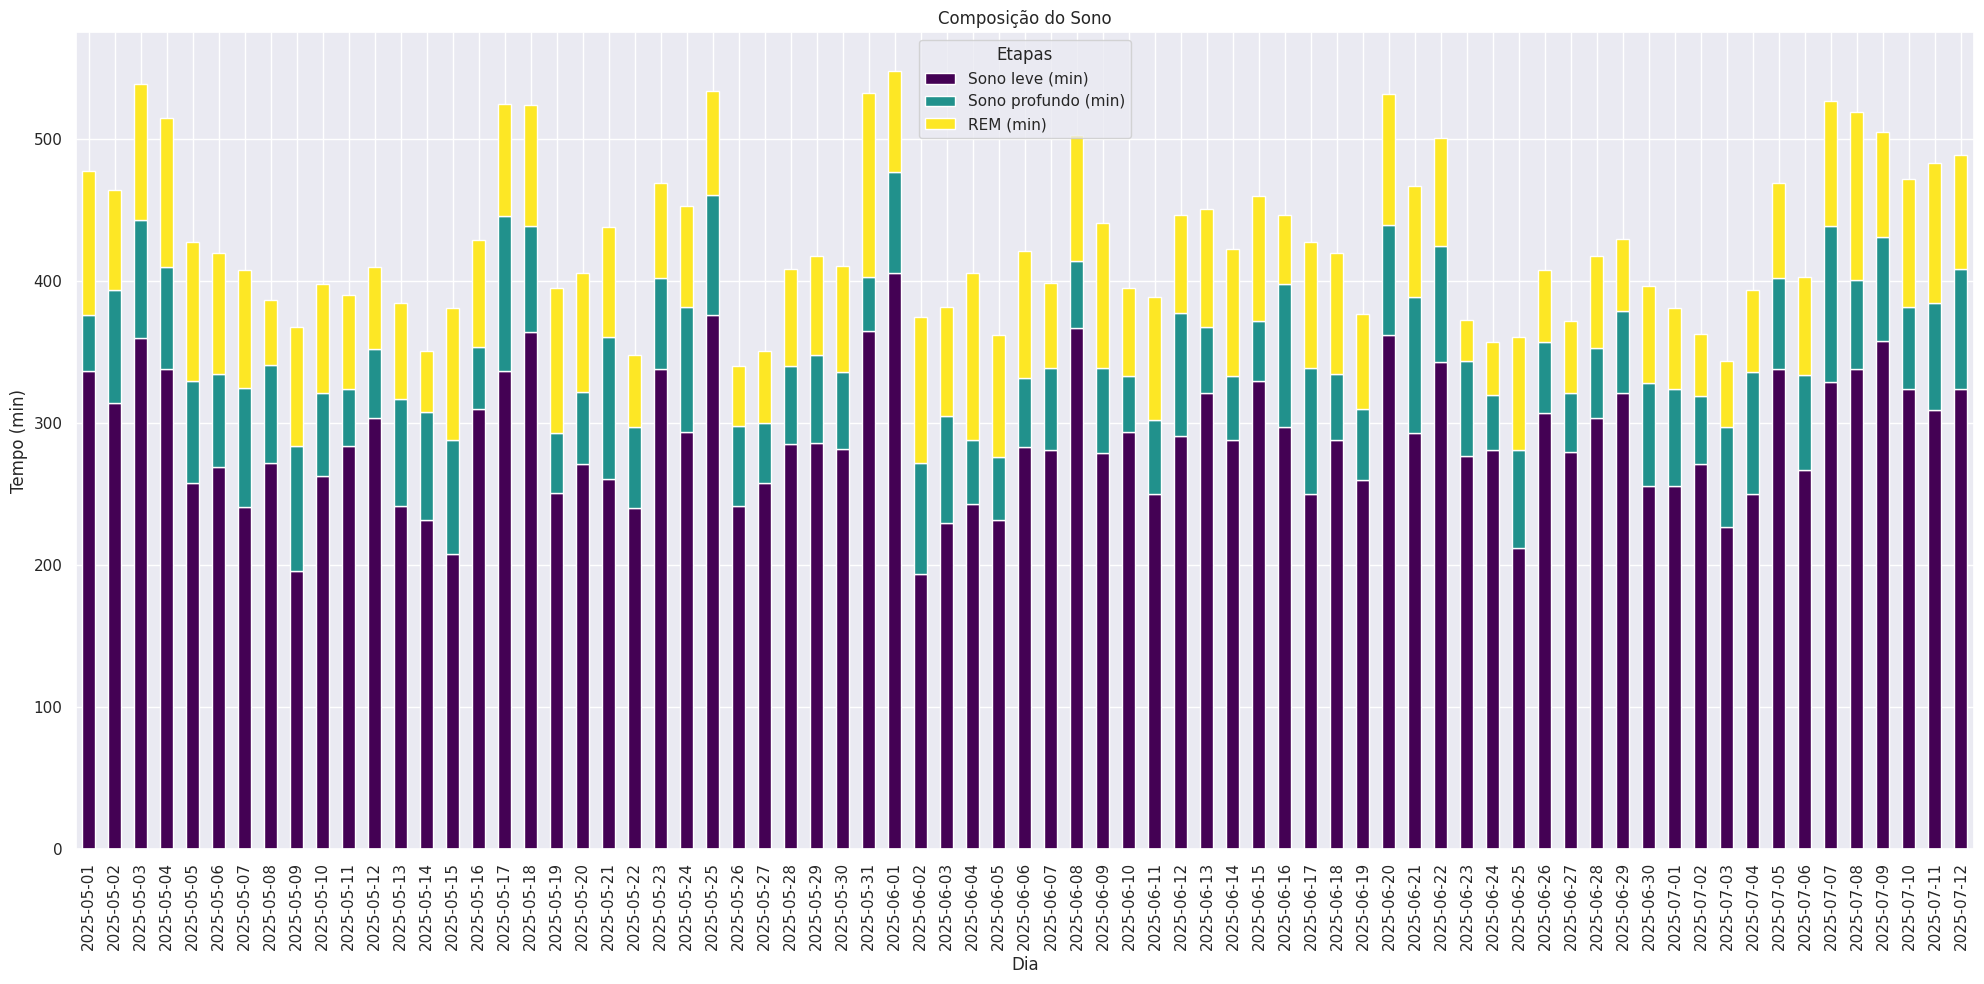

In [24]:

volume = data.groupby("Data")[composicao_sono].sum()

ax = volume.plot(
    kind="bar",
    stacked=True,
    figsize=(20, 10),
    colormap="viridis",
)
plt.title("Composição do Sono")
plt.xlabel("Dia")
plt.ylabel("Tempo (min)")
# plt.xticks(rotation=45, ha="right")
plt.legend(title="Etapas")

plt.tight_layout()
plt.show()



In [25]:
data_ordenado = data.sort_values(by="Pontuação", ascending=False)
data_ordenado.head()

,Data,Dia da semana,Pontuação,Regularidade,Duração (min),Sono leve (min),%Sono leve,Sono profundo (min),%Sono profundo,REM (min),%REM,Tempo acordado,Vezes acordado
1,2025-05-02,sexta-feira,93,90,464,314,67.67,80,17.24,70,15.09,6,1
52,2025-06-22,domingo,91,80,501,343,68.46,82,16.37,76,15.17,11,1
12,2025-05-13,terça-feira,90,75,385,242,62.86,75,19.48,68,17.66,0,0
5,2025-05-06,terça-feira,89,88,420,269,64.05,66,15.71,85,20.24,8,2
47,2025-06-17,terça-feira,89,74,428,250,58.41,89,20.79,89,20.79,4,1
